In [221]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [222]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [223]:
NUM_CLASSES = 11

# Dataset reading

In [224]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (42) + 1)))

In [225]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [226]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [227]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((42, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [228]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_20 (Dropout)        (None, 42)                0         
                                                                 
 dense_30 (Dense)            (None, 20)                860       
                                                                 
 dropout_21 (Dropout)        (None, 20)                0         
                                                                 
 dense_31 (Dense)            (None, 10)                210       
                                                                 
 dense_32 (Dense)            (None, 11)                121       
                                                                 
Total params: 1,191
Trainable params: 1,191
Non-trainable params: 0
_________________________________________________________________


In [229]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [230]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [231]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
1/1 [==============================] - ETA: 0s - loss: 2.3897 - accuracy: 0.1034
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 2s 2s/step - loss: 2.3897 - accuracy: 0.1034 - val_loss: 2.3773 - val_accuracy: 0.2051
Epoch 2/1000
1/1 [==============================] - ETA: 0s - loss: 2.3944 - accuracy: 0.1034
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 90ms/step - loss: 2.3944 - accuracy: 0.1034 - val_loss: 2.3757 - val_accuracy: 0.2051
Epoch 3/1000
1/1 [==============================] - ETA: 0s - loss: 2.4007 - accuracy: 0.0776
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 70ms/step - loss: 2.4007 - accuracy: 0.0776 - val_loss: 2.3742 - val_accuracy: 0.2051
Epoch 4/1000
1/1 [==============================] - ETA: 0s - loss: 2.3993 - accuracy: 0.0862
Epoch 4: savin

1/1 [==============================] - 0s 90ms/step - loss: 2.3631 - accuracy: 0.1121 - val_loss: 2.3402 - val_accuracy: 0.2051
Epoch 29/1000
1/1 [==============================] - ETA: 0s - loss: 2.3605 - accuracy: 0.1034
Epoch 29: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 87ms/step - loss: 2.3605 - accuracy: 0.1034 - val_loss: 2.3389 - val_accuracy: 0.2051
Epoch 30/1000
1/1 [==============================] - ETA: 0s - loss: 2.3597 - accuracy: 0.1121
Epoch 30: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 177ms/step - loss: 2.3597 - accuracy: 0.1121 - val_loss: 2.3377 - val_accuracy: 0.2051
Epoch 31/1000
1/1 [==============================] - ETA: 0s - loss: 2.3565 - accuracy: 0.0862
Epoch 31: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 80ms/step - loss: 2.3565 - accuracy: 0.0862 - val_loss: 2

Epoch 56/1000
1/1 [==============================] - ETA: 0s - loss: 2.2977 - accuracy: 0.1121
Epoch 56: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 242ms/step - loss: 2.2977 - accuracy: 0.1121 - val_loss: 2.3029 - val_accuracy: 0.2051
Epoch 57/1000
1/1 [==============================] - ETA: 0s - loss: 2.3145 - accuracy: 0.0690
Epoch 57: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 225ms/step - loss: 2.3145 - accuracy: 0.0690 - val_loss: 2.3009 - val_accuracy: 0.2051
Epoch 58/1000
1/1 [==============================] - ETA: 0s - loss: 2.3042 - accuracy: 0.1207
Epoch 58: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 207ms/step - loss: 2.3042 - accuracy: 0.1207 - val_loss: 2.2989 - val_accuracy: 0.1795
Epoch 59/1000
1/1 [==============================] - ETA: 0s - loss: 2.3044 - accuracy: 0.0948
Ep

1/1 [==============================] - ETA: 0s - loss: 2.2458 - accuracy: 0.0776
Epoch 83: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 157ms/step - loss: 2.2458 - accuracy: 0.0776 - val_loss: 2.2353 - val_accuracy: 0.0769
Epoch 84/1000
1/1 [==============================] - ETA: 0s - loss: 2.2471 - accuracy: 0.1724
Epoch 84: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 109ms/step - loss: 2.2471 - accuracy: 0.1724 - val_loss: 2.2321 - val_accuracy: 0.0769
Epoch 85/1000
1/1 [==============================] - ETA: 0s - loss: 2.2414 - accuracy: 0.1379
Epoch 85: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 112ms/step - loss: 2.2414 - accuracy: 0.1379 - val_loss: 2.2286 - val_accuracy: 0.0769
Epoch 86/1000
1/1 [==============================] - ETA: 0s - loss: 2.2456 - accuracy: 0.0948
Epoch 86: saving

1/1 [==============================] - ETA: 0s - loss: 2.1543 - accuracy: 0.1638
Epoch 110: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 83ms/step - loss: 2.1543 - accuracy: 0.1638 - val_loss: 2.1478 - val_accuracy: 0.1026
Epoch 111/1000
1/1 [==============================] - ETA: 0s - loss: 2.1397 - accuracy: 0.1810
Epoch 111: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 85ms/step - loss: 2.1397 - accuracy: 0.1810 - val_loss: 2.1446 - val_accuracy: 0.1026
Epoch 112/1000
1/1 [==============================] - ETA: 0s - loss: 2.1469 - accuracy: 0.1552
Epoch 112: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 83ms/step - loss: 2.1469 - accuracy: 0.1552 - val_loss: 2.1414 - val_accuracy: 0.1026
Epoch 113/1000
1/1 [==============================] - ETA: 0s - loss: 2.1447 - accuracy: 0.1638
Epoch 113: sa

1/1 [==============================] - ETA: 0s - loss: 2.0564 - accuracy: 0.2155
Epoch 137: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 119ms/step - loss: 2.0564 - accuracy: 0.2155 - val_loss: 2.0534 - val_accuracy: 0.3077
Epoch 138/1000
1/1 [==============================] - ETA: 0s - loss: 2.1049 - accuracy: 0.1466
Epoch 138: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 123ms/step - loss: 2.1049 - accuracy: 0.1466 - val_loss: 2.0498 - val_accuracy: 0.3077
Epoch 139/1000
1/1 [==============================] - ETA: 0s - loss: 2.0313 - accuracy: 0.2241
Epoch 139: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 152ms/step - loss: 2.0313 - accuracy: 0.2241 - val_loss: 2.0460 - val_accuracy: 0.3077
Epoch 140/1000
1/1 [==============================] - ETA: 0s - loss: 2.0961 - accuracy: 0.1379
Epoch 140:

1/1 [==============================] - ETA: 0s - loss: 1.9915 - accuracy: 0.2672
Epoch 164: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 95ms/step - loss: 1.9915 - accuracy: 0.2672 - val_loss: 1.9540 - val_accuracy: 0.3077
Epoch 165/1000
1/1 [==============================] - ETA: 0s - loss: 2.0068 - accuracy: 0.2155
Epoch 165: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 94ms/step - loss: 2.0068 - accuracy: 0.2155 - val_loss: 1.9502 - val_accuracy: 0.3077
Epoch 166/1000
1/1 [==============================] - ETA: 0s - loss: 1.9622 - accuracy: 0.2845
Epoch 166: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 90ms/step - loss: 1.9622 - accuracy: 0.2845 - val_loss: 1.9463 - val_accuracy: 0.3077
Epoch 167/1000
1/1 [==============================] - ETA: 0s - loss: 1.9678 - accuracy: 0.2241
Epoch 167: sa

1/1 [==============================] - ETA: 0s - loss: 1.9028 - accuracy: 0.2931
Epoch 191: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 94ms/step - loss: 1.9028 - accuracy: 0.2931 - val_loss: 1.8427 - val_accuracy: 0.3333
Epoch 192/1000
1/1 [==============================] - ETA: 0s - loss: 1.9497 - accuracy: 0.2500
Epoch 192: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 84ms/step - loss: 1.9497 - accuracy: 0.2500 - val_loss: 1.8393 - val_accuracy: 0.3333
Epoch 193/1000
1/1 [==============================] - ETA: 0s - loss: 1.8996 - accuracy: 0.3448
Epoch 193: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 82ms/step - loss: 1.8996 - accuracy: 0.3448 - val_loss: 1.8358 - val_accuracy: 0.3333
Epoch 194/1000
1/1 [==============================] - ETA: 0s - loss: 1.9039 - accuracy: 0.2931
Epoch 194: sa

1/1 [==============================] - ETA: 0s - loss: 1.7800 - accuracy: 0.3793
Epoch 218: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 109ms/step - loss: 1.7800 - accuracy: 0.3793 - val_loss: 1.7152 - val_accuracy: 0.4359
Epoch 219/1000
1/1 [==============================] - ETA: 0s - loss: 1.8039 - accuracy: 0.3276
Epoch 219: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 113ms/step - loss: 1.8039 - accuracy: 0.3276 - val_loss: 1.7098 - val_accuracy: 0.4359
Epoch 220/1000
1/1 [==============================] - ETA: 0s - loss: 1.7571 - accuracy: 0.3793
Epoch 220: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 119ms/step - loss: 1.7571 - accuracy: 0.3793 - val_loss: 1.7042 - val_accuracy: 0.4359
Epoch 221/1000
1/1 [==============================] - ETA: 0s - loss: 1.8070 - accuracy: 0.3621
Epoch 221:

1/1 [==============================] - ETA: 0s - loss: 1.6032 - accuracy: 0.4224
Epoch 245: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 139ms/step - loss: 1.6032 - accuracy: 0.4224 - val_loss: 1.5706 - val_accuracy: 0.4872
Epoch 246/1000
1/1 [==============================] - ETA: 0s - loss: 1.5754 - accuracy: 0.4569
Epoch 246: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 226ms/step - loss: 1.5754 - accuracy: 0.4569 - val_loss: 1.5654 - val_accuracy: 0.4872
Epoch 247/1000
1/1 [==============================] - ETA: 0s - loss: 1.6049 - accuracy: 0.4397
Epoch 247: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 127ms/step - loss: 1.6049 - accuracy: 0.4397 - val_loss: 1.5598 - val_accuracy: 0.4872
Epoch 248/1000
1/1 [==============================] - ETA: 0s - loss: 1.6429 - accuracy: 0.4052
Epoch 248:

1/1 [==============================] - ETA: 0s - loss: 1.5698 - accuracy: 0.4138
Epoch 272: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 80ms/step - loss: 1.5698 - accuracy: 0.4138 - val_loss: 1.4131 - val_accuracy: 0.5641
Epoch 273/1000
1/1 [==============================] - ETA: 0s - loss: 1.5001 - accuracy: 0.4569
Epoch 273: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 108ms/step - loss: 1.5001 - accuracy: 0.4569 - val_loss: 1.4079 - val_accuracy: 0.5641
Epoch 274/1000
1/1 [==============================] - ETA: 0s - loss: 1.5216 - accuracy: 0.4224
Epoch 274: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 85ms/step - loss: 1.5216 - accuracy: 0.4224 - val_loss: 1.4024 - val_accuracy: 0.5641
Epoch 275/1000
1/1 [==============================] - ETA: 0s - loss: 1.5208 - accuracy: 0.4397
Epoch 275: s

1/1 [==============================] - ETA: 0s - loss: 1.4077 - accuracy: 0.4397
Epoch 299: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 92ms/step - loss: 1.4077 - accuracy: 0.4397 - val_loss: 1.2912 - val_accuracy: 0.5385
Epoch 300/1000
1/1 [==============================] - ETA: 0s - loss: 1.4167 - accuracy: 0.5259
Epoch 300: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 96ms/step - loss: 1.4167 - accuracy: 0.5259 - val_loss: 1.2868 - val_accuracy: 0.5385
Epoch 301/1000
1/1 [==============================] - ETA: 0s - loss: 1.4586 - accuracy: 0.4655
Epoch 301: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 106ms/step - loss: 1.4586 - accuracy: 0.4655 - val_loss: 1.2828 - val_accuracy: 0.5385
Epoch 302/1000
1/1 [==============================] - ETA: 0s - loss: 1.3728 - accuracy: 0.4569
Epoch 302: s

1/1 [==============================] - ETA: 0s - loss: 1.3812 - accuracy: 0.4828
Epoch 326: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 84ms/step - loss: 1.3812 - accuracy: 0.4828 - val_loss: 1.2032 - val_accuracy: 0.5897
Epoch 327/1000
1/1 [==============================] - ETA: 0s - loss: 1.3855 - accuracy: 0.4397
Epoch 327: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 98ms/step - loss: 1.3855 - accuracy: 0.4397 - val_loss: 1.2005 - val_accuracy: 0.5641
Epoch 328/1000
1/1 [==============================] - ETA: 0s - loss: 1.3197 - accuracy: 0.5690
Epoch 328: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 80ms/step - loss: 1.3197 - accuracy: 0.5690 - val_loss: 1.1977 - val_accuracy: 0.5641
Epoch 329/1000
1/1 [==============================] - ETA: 0s - loss: 1.3395 - accuracy: 0.5603
Epoch 329: sa

1/1 [==============================] - ETA: 0s - loss: 1.2473 - accuracy: 0.5517
Epoch 353: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 97ms/step - loss: 1.2473 - accuracy: 0.5517 - val_loss: 1.1108 - val_accuracy: 0.6923
Epoch 354/1000
1/1 [==============================] - ETA: 0s - loss: 1.3198 - accuracy: 0.5086
Epoch 354: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 88ms/step - loss: 1.3198 - accuracy: 0.5086 - val_loss: 1.1080 - val_accuracy: 0.6923
Epoch 355/1000
1/1 [==============================] - ETA: 0s - loss: 1.2336 - accuracy: 0.5345
Epoch 355: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 80ms/step - loss: 1.2336 - accuracy: 0.5345 - val_loss: 1.1048 - val_accuracy: 0.6923
Epoch 356/1000
1/1 [==============================] - ETA: 0s - loss: 1.2231 - accuracy: 0.5345
Epoch 356: sa

1/1 [==============================] - ETA: 0s - loss: 1.1973 - accuracy: 0.5603
Epoch 380: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 83ms/step - loss: 1.1973 - accuracy: 0.5603 - val_loss: 1.0322 - val_accuracy: 0.7949
Epoch 381/1000
1/1 [==============================] - ETA: 0s - loss: 1.1190 - accuracy: 0.6034
Epoch 381: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 92ms/step - loss: 1.1190 - accuracy: 0.6034 - val_loss: 1.0293 - val_accuracy: 0.7949
Epoch 382/1000
1/1 [==============================] - ETA: 0s - loss: 1.2062 - accuracy: 0.4828
Epoch 382: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 111ms/step - loss: 1.2062 - accuracy: 0.4828 - val_loss: 1.0266 - val_accuracy: 0.7949
Epoch 383/1000
1/1 [==============================] - ETA: 0s - loss: 1.2270 - accuracy: 0.5172
Epoch 383: s

1/1 [==============================] - ETA: 0s - loss: 1.0933 - accuracy: 0.6207
Epoch 407: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 101ms/step - loss: 1.0933 - accuracy: 0.6207 - val_loss: 0.9698 - val_accuracy: 0.7949
Epoch 408/1000
1/1 [==============================] - ETA: 0s - loss: 1.2288 - accuracy: 0.5000
Epoch 408: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 84ms/step - loss: 1.2288 - accuracy: 0.5000 - val_loss: 0.9671 - val_accuracy: 0.7949
Epoch 409/1000
1/1 [==============================] - ETA: 0s - loss: 1.1994 - accuracy: 0.5603
Epoch 409: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 76ms/step - loss: 1.1994 - accuracy: 0.5603 - val_loss: 0.9647 - val_accuracy: 0.7949
Epoch 410/1000
1/1 [==============================] - ETA: 0s - loss: 1.1877 - accuracy: 0.5086
Epoch 410: s

1/1 [==============================] - ETA: 0s - loss: 1.0211 - accuracy: 0.6466
Epoch 434: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 69ms/step - loss: 1.0211 - accuracy: 0.6466 - val_loss: 0.8873 - val_accuracy: 0.8718
Epoch 435/1000
1/1 [==============================] - ETA: 0s - loss: 1.1907 - accuracy: 0.5603
Epoch 435: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 60ms/step - loss: 1.1907 - accuracy: 0.5603 - val_loss: 0.8847 - val_accuracy: 0.8718
Epoch 436/1000
1/1 [==============================] - ETA: 0s - loss: 1.0866 - accuracy: 0.5776
Epoch 436: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 59ms/step - loss: 1.0866 - accuracy: 0.5776 - val_loss: 0.8826 - val_accuracy: 0.8718
Epoch 437/1000
1/1 [==============================] - ETA: 0s - loss: 1.0406 - accuracy: 0.6552
Epoch 437: sa

1/1 [==============================] - ETA: 0s - loss: 1.0704 - accuracy: 0.6379
Epoch 461: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 102ms/step - loss: 1.0704 - accuracy: 0.6379 - val_loss: 0.8525 - val_accuracy: 0.8205
Epoch 462/1000
1/1 [==============================] - ETA: 0s - loss: 1.0692 - accuracy: 0.6121
Epoch 462: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 81ms/step - loss: 1.0692 - accuracy: 0.6121 - val_loss: 0.8507 - val_accuracy: 0.8205
Epoch 463/1000
1/1 [==============================] - ETA: 0s - loss: 1.0076 - accuracy: 0.6897
Epoch 463: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 70ms/step - loss: 1.0076 - accuracy: 0.6897 - val_loss: 0.8482 - val_accuracy: 0.8205
Epoch 464/1000
1/1 [==============================] - ETA: 0s - loss: 1.0387 - accuracy: 0.6379
Epoch 464: s

1/1 [==============================] - ETA: 0s - loss: 0.9174 - accuracy: 0.6897
Epoch 488: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 70ms/step - loss: 0.9174 - accuracy: 0.6897 - val_loss: 0.7872 - val_accuracy: 0.8718
Epoch 489/1000
1/1 [==============================] - ETA: 0s - loss: 1.0204 - accuracy: 0.6379
Epoch 489: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 101ms/step - loss: 1.0204 - accuracy: 0.6379 - val_loss: 0.7845 - val_accuracy: 0.8718
Epoch 490/1000
1/1 [==============================] - ETA: 0s - loss: 0.9020 - accuracy: 0.6983
Epoch 490: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 94ms/step - loss: 0.9020 - accuracy: 0.6983 - val_loss: 0.7809 - val_accuracy: 0.8718
Epoch 491/1000
1/1 [==============================] - ETA: 0s - loss: 1.0241 - accuracy: 0.6121
Epoch 491: s

1/1 [==============================] - ETA: 0s - loss: 0.9520 - accuracy: 0.6724
Epoch 515: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 78ms/step - loss: 0.9520 - accuracy: 0.6724 - val_loss: 0.7358 - val_accuracy: 0.9231
Epoch 516/1000
1/1 [==============================] - ETA: 0s - loss: 1.0280 - accuracy: 0.6121
Epoch 516: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 77ms/step - loss: 1.0280 - accuracy: 0.6121 - val_loss: 0.7349 - val_accuracy: 0.9231
Epoch 517/1000
1/1 [==============================] - ETA: 0s - loss: 0.9188 - accuracy: 0.6724
Epoch 517: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 80ms/step - loss: 0.9188 - accuracy: 0.6724 - val_loss: 0.7336 - val_accuracy: 0.9231
Epoch 518/1000
1/1 [==============================] - ETA: 0s - loss: 0.8838 - accuracy: 0.6724
Epoch 518: sa

1/1 [==============================] - ETA: 0s - loss: 0.9059 - accuracy: 0.6810
Epoch 542: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 120ms/step - loss: 0.9059 - accuracy: 0.6810 - val_loss: 0.7033 - val_accuracy: 0.9231
Epoch 543/1000
1/1 [==============================] - ETA: 0s - loss: 0.9430 - accuracy: 0.6379
Epoch 543: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 130ms/step - loss: 0.9430 - accuracy: 0.6379 - val_loss: 0.7022 - val_accuracy: 0.8974
Epoch 544/1000
1/1 [==============================] - ETA: 0s - loss: 1.0370 - accuracy: 0.6724
Epoch 544: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 155ms/step - loss: 1.0370 - accuracy: 0.6724 - val_loss: 0.7007 - val_accuracy: 0.8974
Epoch 545/1000
1/1 [==============================] - ETA: 0s - loss: 0.9992 - accuracy: 0.6466
Epoch 545:

1/1 [==============================] - ETA: 0s - loss: 0.8868 - accuracy: 0.7500
Epoch 569: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 107ms/step - loss: 0.8868 - accuracy: 0.7500 - val_loss: 0.6655 - val_accuracy: 0.9487
Epoch 570/1000
1/1 [==============================] - ETA: 0s - loss: 0.8741 - accuracy: 0.7586
Epoch 570: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 103ms/step - loss: 0.8741 - accuracy: 0.7586 - val_loss: 0.6644 - val_accuracy: 0.9487
Epoch 571/1000
1/1 [==============================] - ETA: 0s - loss: 0.9168 - accuracy: 0.6552
Epoch 571: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 121ms/step - loss: 0.9168 - accuracy: 0.6552 - val_loss: 0.6633 - val_accuracy: 0.9487
Epoch 572/1000
1/1 [==============================] - ETA: 0s - loss: 0.9252 - accuracy: 0.6810
Epoch 572:

1/1 [==============================] - ETA: 0s - loss: 0.8518 - accuracy: 0.6983
Epoch 596: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 124ms/step - loss: 0.8518 - accuracy: 0.6983 - val_loss: 0.6378 - val_accuracy: 0.9487
Epoch 597/1000
1/1 [==============================] - ETA: 0s - loss: 0.8196 - accuracy: 0.7069
Epoch 597: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 364ms/step - loss: 0.8196 - accuracy: 0.7069 - val_loss: 0.6371 - val_accuracy: 0.9487
Epoch 598/1000
1/1 [==============================] - ETA: 0s - loss: 0.8574 - accuracy: 0.7155
Epoch 598: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 249ms/step - loss: 0.8574 - accuracy: 0.7155 - val_loss: 0.6361 - val_accuracy: 0.9487
Epoch 599/1000
1/1 [==============================] - ETA: 0s - loss: 0.9099 - accuracy: 0.6293
Epoch 599:

1/1 [==============================] - ETA: 0s - loss: 0.9850 - accuracy: 0.6724
Epoch 623: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 147ms/step - loss: 0.9850 - accuracy: 0.6724 - val_loss: 0.6033 - val_accuracy: 0.9487
Epoch 624/1000
1/1 [==============================] - ETA: 0s - loss: 0.8891 - accuracy: 0.6638
Epoch 624: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 152ms/step - loss: 0.8891 - accuracy: 0.6638 - val_loss: 0.6041 - val_accuracy: 0.9487
Epoch 625/1000
1/1 [==============================] - ETA: 0s - loss: 0.8476 - accuracy: 0.6983
Epoch 625: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 275ms/step - loss: 0.8476 - accuracy: 0.6983 - val_loss: 0.6046 - val_accuracy: 0.9487
Epoch 626/1000
1/1 [==============================] - ETA: 0s - loss: 0.9167 - accuracy: 0.6379
Epoch 626:

1/1 [==============================] - ETA: 0s - loss: 0.8612 - accuracy: 0.6983
Epoch 650: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 112ms/step - loss: 0.8612 - accuracy: 0.6983 - val_loss: 0.5817 - val_accuracy: 0.9487
Epoch 651/1000
1/1 [==============================] - ETA: 0s - loss: 0.8684 - accuracy: 0.6466
Epoch 651: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 81ms/step - loss: 0.8684 - accuracy: 0.6466 - val_loss: 0.5813 - val_accuracy: 0.9487
Epoch 652/1000
1/1 [==============================] - ETA: 0s - loss: 0.8598 - accuracy: 0.6810
Epoch 652: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 71ms/step - loss: 0.8598 - accuracy: 0.6810 - val_loss: 0.5807 - val_accuracy: 0.9487
Epoch 653/1000
1/1 [==============================] - ETA: 0s - loss: 0.7801 - accuracy: 0.7586
Epoch 653: s

1/1 [==============================] - ETA: 0s - loss: 0.8538 - accuracy: 0.6724
Epoch 677: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 138ms/step - loss: 0.8538 - accuracy: 0.6724 - val_loss: 0.5438 - val_accuracy: 0.9487
Epoch 678/1000
1/1 [==============================] - ETA: 0s - loss: 0.8245 - accuracy: 0.7069
Epoch 678: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 198ms/step - loss: 0.8245 - accuracy: 0.7069 - val_loss: 0.5422 - val_accuracy: 0.9487
Epoch 679/1000
1/1 [==============================] - ETA: 0s - loss: 0.8727 - accuracy: 0.6983
Epoch 679: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 107ms/step - loss: 0.8727 - accuracy: 0.6983 - val_loss: 0.5411 - val_accuracy: 0.9487
Epoch 680/1000
1/1 [==============================] - ETA: 0s - loss: 0.7289 - accuracy: 0.7672
Epoch 680:

1/1 [==============================] - ETA: 0s - loss: 0.8576 - accuracy: 0.6379
Epoch 704: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 180ms/step - loss: 0.8576 - accuracy: 0.6379 - val_loss: 0.5383 - val_accuracy: 0.9487
Epoch 705/1000
1/1 [==============================] - ETA: 0s - loss: 0.8257 - accuracy: 0.6983
Epoch 705: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 142ms/step - loss: 0.8257 - accuracy: 0.6983 - val_loss: 0.5374 - val_accuracy: 0.9487
Epoch 706/1000
1/1 [==============================] - ETA: 0s - loss: 0.8317 - accuracy: 0.6983
Epoch 706: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 187ms/step - loss: 0.8317 - accuracy: 0.6983 - val_loss: 0.5370 - val_accuracy: 0.9487
Epoch 707/1000
1/1 [==============================] - ETA: 0s - loss: 0.8107 - accuracy: 0.7155
Epoch 707:

1/1 [==============================] - ETA: 0s - loss: 0.7820 - accuracy: 0.7414
Epoch 731: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 180ms/step - loss: 0.7820 - accuracy: 0.7414 - val_loss: 0.5107 - val_accuracy: 0.9487
Epoch 732/1000
1/1 [==============================] - ETA: 0s - loss: 0.8885 - accuracy: 0.7155
Epoch 732: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 265ms/step - loss: 0.8885 - accuracy: 0.7155 - val_loss: 0.5110 - val_accuracy: 0.9487
Epoch 733/1000
1/1 [==============================] - ETA: 0s - loss: 0.8158 - accuracy: 0.6983
Epoch 733: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 250ms/step - loss: 0.8158 - accuracy: 0.6983 - val_loss: 0.5116 - val_accuracy: 0.9487
Epoch 734/1000
1/1 [==============================] - ETA: 0s - loss: 0.8377 - accuracy: 0.6897
Epoch 734:

1/1 [==============================] - ETA: 0s - loss: 0.7915 - accuracy: 0.7155
Epoch 758: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 274ms/step - loss: 0.7915 - accuracy: 0.7155 - val_loss: 0.4862 - val_accuracy: 0.9487
Epoch 759/1000
1/1 [==============================] - ETA: 0s - loss: 0.7485 - accuracy: 0.7328
Epoch 759: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 413ms/step - loss: 0.7485 - accuracy: 0.7328 - val_loss: 0.4865 - val_accuracy: 0.9487
Epoch 760/1000
1/1 [==============================] - ETA: 0s - loss: 0.8761 - accuracy: 0.6293
Epoch 760: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 208ms/step - loss: 0.8761 - accuracy: 0.6293 - val_loss: 0.4873 - val_accuracy: 0.9487
Epoch 761/1000
1/1 [==============================] - ETA: 0s - loss: 0.8468 - accuracy: 0.7241
Epoch 761:

1/1 [==============================] - ETA: 0s - loss: 0.7843 - accuracy: 0.6724
Epoch 785: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 118ms/step - loss: 0.7843 - accuracy: 0.6724 - val_loss: 0.4801 - val_accuracy: 0.9487
Epoch 786/1000
1/1 [==============================] - ETA: 0s - loss: 0.7903 - accuracy: 0.6810
Epoch 786: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 131ms/step - loss: 0.7903 - accuracy: 0.6810 - val_loss: 0.4793 - val_accuracy: 0.9487
Epoch 787/1000
1/1 [==============================] - ETA: 0s - loss: 0.8743 - accuracy: 0.6897
Epoch 787: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 172ms/step - loss: 0.8743 - accuracy: 0.6897 - val_loss: 0.4788 - val_accuracy: 0.9487
Epoch 788/1000
1/1 [==============================] - ETA: 0s - loss: 0.7503 - accuracy: 0.7500
Epoch 788:

1/1 [==============================] - ETA: 0s - loss: 0.7029 - accuracy: 0.7500
Epoch 812: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 70ms/step - loss: 0.7029 - accuracy: 0.7500 - val_loss: 0.4737 - val_accuracy: 0.9487
Epoch 813/1000
1/1 [==============================] - ETA: 0s - loss: 0.8480 - accuracy: 0.6466
Epoch 813: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 111ms/step - loss: 0.8480 - accuracy: 0.6466 - val_loss: 0.4729 - val_accuracy: 0.9487
Epoch 814/1000
1/1 [==============================] - ETA: 0s - loss: 0.7512 - accuracy: 0.7414
Epoch 814: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 103ms/step - loss: 0.7512 - accuracy: 0.7414 - val_loss: 0.4713 - val_accuracy: 0.9487
Epoch 815/1000
1/1 [==============================] - ETA: 0s - loss: 0.7689 - accuracy: 0.7241
Epoch 815: 

1/1 [==============================] - ETA: 0s - loss: 0.7513 - accuracy: 0.7328
Epoch 839: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 250ms/step - loss: 0.7513 - accuracy: 0.7328 - val_loss: 0.4429 - val_accuracy: 0.9487
Epoch 840/1000
1/1 [==============================] - ETA: 0s - loss: 0.7786 - accuracy: 0.7328
Epoch 840: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 91ms/step - loss: 0.7786 - accuracy: 0.7328 - val_loss: 0.4428 - val_accuracy: 0.9487
Epoch 841/1000
1/1 [==============================] - ETA: 0s - loss: 0.7716 - accuracy: 0.7328
Epoch 841: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 95ms/step - loss: 0.7716 - accuracy: 0.7328 - val_loss: 0.4428 - val_accuracy: 0.9487
Epoch 842/1000
1/1 [==============================] - ETA: 0s - loss: 0.7465 - accuracy: 0.7241
Epoch 842: s

1/1 [==============================] - ETA: 0s - loss: 0.7875 - accuracy: 0.7155
Epoch 866: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 134ms/step - loss: 0.7875 - accuracy: 0.7155 - val_loss: 0.4392 - val_accuracy: 0.9487
Epoch 867/1000
1/1 [==============================] - ETA: 0s - loss: 0.5541 - accuracy: 0.8190
Epoch 867: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 156ms/step - loss: 0.5541 - accuracy: 0.8190 - val_loss: 0.4385 - val_accuracy: 0.9487
Epoch 868/1000
1/1 [==============================] - ETA: 0s - loss: 0.8399 - accuracy: 0.6983
Epoch 868: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 135ms/step - loss: 0.8399 - accuracy: 0.6983 - val_loss: 0.4385 - val_accuracy: 0.9487
Epoch 869/1000
1/1 [==============================] - ETA: 0s - loss: 0.7104 - accuracy: 0.7155
Epoch 869:

1/1 [==============================] - ETA: 0s - loss: 0.6665 - accuracy: 0.7759
Epoch 893: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 145ms/step - loss: 0.6665 - accuracy: 0.7759 - val_loss: 0.4176 - val_accuracy: 0.9487
Epoch 894/1000
1/1 [==============================] - ETA: 0s - loss: 0.6976 - accuracy: 0.7414
Epoch 894: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 97ms/step - loss: 0.6976 - accuracy: 0.7414 - val_loss: 0.4169 - val_accuracy: 0.9487
Epoch 895/1000
1/1 [==============================] - ETA: 0s - loss: 0.7038 - accuracy: 0.7328
Epoch 895: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 62ms/step - loss: 0.7038 - accuracy: 0.7328 - val_loss: 0.4163 - val_accuracy: 0.9487
Epoch 896/1000
1/1 [==============================] - ETA: 0s - loss: 0.7170 - accuracy: 0.7328
Epoch 896: s

1/1 [==============================] - ETA: 0s - loss: 0.7860 - accuracy: 0.6983
Epoch 920: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 132ms/step - loss: 0.7860 - accuracy: 0.6983 - val_loss: 0.3990 - val_accuracy: 0.9487
Epoch 921/1000
1/1 [==============================] - ETA: 0s - loss: 0.7183 - accuracy: 0.7069
Epoch 921: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 116ms/step - loss: 0.7183 - accuracy: 0.7069 - val_loss: 0.3991 - val_accuracy: 0.9487
Epoch 922/1000
1/1 [==============================] - ETA: 0s - loss: 0.6207 - accuracy: 0.7586
Epoch 922: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 108ms/step - loss: 0.6207 - accuracy: 0.7586 - val_loss: 0.3987 - val_accuracy: 0.9487
Epoch 923/1000
1/1 [==============================] - ETA: 0s - loss: 0.6869 - accuracy: 0.7500
Epoch 923:

1/1 [==============================] - ETA: 0s - loss: 0.7778 - accuracy: 0.7155
Epoch 947: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 172ms/step - loss: 0.7778 - accuracy: 0.7155 - val_loss: 0.3878 - val_accuracy: 0.9487
Epoch 948/1000
1/1 [==============================] - ETA: 0s - loss: 0.7076 - accuracy: 0.7500
Epoch 948: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 90ms/step - loss: 0.7076 - accuracy: 0.7500 - val_loss: 0.3882 - val_accuracy: 0.9487
Epoch 949/1000
1/1 [==============================] - ETA: 0s - loss: 0.7545 - accuracy: 0.7759
Epoch 949: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 97ms/step - loss: 0.7545 - accuracy: 0.7759 - val_loss: 0.3889 - val_accuracy: 0.9487
Epoch 950/1000
1/1 [==============================] - ETA: 0s - loss: 0.7211 - accuracy: 0.7241
Epoch 950: s

1/1 [==============================] - ETA: 0s - loss: 0.6824 - accuracy: 0.8017
Epoch 974: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 128ms/step - loss: 0.6824 - accuracy: 0.8017 - val_loss: 0.3732 - val_accuracy: 0.9487
Epoch 975/1000
1/1 [==============================] - ETA: 0s - loss: 0.7852 - accuracy: 0.6983
Epoch 975: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 105ms/step - loss: 0.7852 - accuracy: 0.6983 - val_loss: 0.3729 - val_accuracy: 0.9487
Epoch 976/1000
1/1 [==============================] - ETA: 0s - loss: 0.7782 - accuracy: 0.6983
Epoch 976: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 122ms/step - loss: 0.7782 - accuracy: 0.6983 - val_loss: 0.3729 - val_accuracy: 0.9487
Epoch 977/1000
1/1 [==============================] - ETA: 0s - loss: 0.6364 - accuracy: 0.8017
Epoch 977:

In [232]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

1/1 [==============================] - 0s 44ms/step - loss: 0.3680 - accuracy: 0.9487


In [233]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [234]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 215ms/step
[6.1474475e-06 5.1241117e-05 7.5879866e-06 6.3918460e-06 4.1183307e-06
 8.6723463e-05 1.1029045e-02 3.0514058e-01 6.2398060e-05 5.5235881e-01
 1.3124689e-01]
9


# Confusion matrix

2/2 [==============================] - 0s 2ms/step


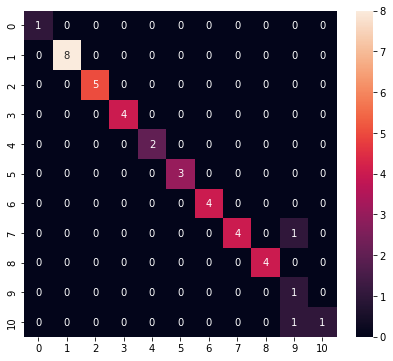

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         4
           7       1.00      0.80      0.89         5
           8       1.00      1.00      1.00         4
           9       0.33      1.00      0.50         1
          10       1.00      0.50      0.67         2

    accuracy                           0.95        39
   macro avg       0.94      0.94      0.91        39
weighted avg       0.98      0.95      0.96        39



In [235]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [236]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [237]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\facut\AppData\Local\Temp\tmp9o_gqj_n\assets


INFO:tensorflow:Assets written to: C:\Users\facut\AppData\Local\Temp\tmp9o_gqj_n\assets


6876

# Inference test

In [238]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [239]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [240]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [241]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [242]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[6.1474479e-06 5.1241117e-05 7.5879857e-06 6.3918465e-06 4.1183307e-06
 8.6723383e-05 1.1029043e-02 3.0514055e-01 6.2398060e-05 5.5235881e-01
 1.3124697e-01]
9
